In [1]:
path = '../cuongdv-round2/logs/solver_v3.log'

In [2]:
import re

In [3]:

with open(path, 'r') as f:
    lines = f.readlines()

print(lines)

['2024-09-21 00:31:33,522 - Solving Seed-2381 - Initial solution: 1088137017.386087\n', '2024-09-21 00:31:33,540 - Solving Seed-9221 - Initial solution: 1095361044.886087\n', '2024-09-21 00:31:33,615 - Solving Seed-6829 - Initial solution: 971615910.3860871\n', '2024-09-21 00:31:33,647 - Solving Seed-8053 - Initial solution: 1255318566.386087\n', '2024-09-21 00:31:33,683 - Solving Seed-9859 - Initial solution: 1327749664.386087\n', '2024-09-21 00:31:33,730 - Solving Seed-6047 - Initial solution: 1002403538.386087\n', '2024-09-21 00:31:33,738 - Solving Seed-8677 - Initial solution: 990697089.886087\n', '2024-09-21 00:31:33,739 - Solving Seed-2521 - Initial solution: 928377523.3860871\n', '2024-09-21 00:31:33,749 - Solving Seed-5351 - Initial solution: 1031477793.8860871\n', '2024-09-21 00:31:33,755 - Solving Seed-1097 - Initial solution: 1137912031.886087\n', '2024-09-21 00:32:23,167 - Solving Seed-9859 - Removed 927 servers with total gain 17166385.761304855\n', '2024-09-21 00:32:23,16

In [4]:
def process_msg(msg):
    words = msg.split(' ')
    action = words[0]
    if words[0] in ('Removed', 'Added', 'Merged'):
        value = float(words[6])
        addition_value = int(words[1])
    elif words[0] == 'Initial':
        value = float(words[2])
        addition_value = None
    elif words[0] == 'New':
        value = float(words[3])
        addition_value = None
    elif words[0] == 'Optimized':
        value = float(words[5])
        addition_value = None
    else:
        print(msg)

    return {
        'action': action,
        'value': value,
        'addition_value': addition_value,
    }


In [5]:
seeds = {}
## init
pattern = r'(\d{4}-\d{2}-\d{2}) (\d{2}:\d{2}:\d{2},\d{3}) - (.+?) - (.+)'
for line in lines:
    match = re.match(pattern, line)
    if match:
        date = match.group(1)
        time = match.group(2)
        seed = match.group(3)
        message = match.group(4)
        if seed not in seeds:
            seeds[seed] = []
        action = process_msg(message)
        seeds[seed].append((date, time, action))

In [6]:
for _, time , action in seeds['Solving Seed-2381']:
    print(f"{time} - {action}")

00:31:33,522 - {'action': 'Initial', 'value': 1088137017.386087, 'addition_value': None}
00:32:31,243 - {'action': 'Removed', 'value': 90310206.3448565, 'addition_value': 4418}
00:32:31,244 - {'action': 'New', 'value': 1178447223.7309434, 'addition_value': None}
00:41:41,946 - {'action': 'Added', 'value': 610599164.3234487, 'addition_value': 23831}
00:41:41,947 - {'action': 'New', 'value': 1789046388.054392, 'addition_value': None}
00:42:01,251 - {'action': 'Merged', 'value': 4854977.767203093, 'addition_value': 559}
00:42:01,469 - {'action': 'New', 'value': 1793901365.8215952, 'addition_value': None}
00:45:28,466 - {'action': 'Removed', 'value': 126214288.81684685, 'addition_value': 7208}
00:45:28,469 - {'action': 'New', 'value': 1920115654.638442, 'addition_value': None}
00:45:30,770 - {'action': 'Optimized', 'value': 89676294.36457682, 'addition_value': None}
00:45:30,770 - {'action': 'New', 'value': 2009791949.0030189, 'addition_value': None}
00:57:16,579 - {'action': 'Added', 'val

In [7]:
# keys = [
#     'Removed',
#     'Added',
#     'Merged',
#     'Initial solution',
#     'Optimized selling prices with gain',
#     'New best solution: '

# ]


# # Removed 4418 servers with total gain 90310206.3448565
# # Added 23831 servers with total gain 610599164.3234487
# # Merged 363 servers with total gain 2474552.88818264
# # Initial solution: 1088137017.386087
# # Optimized selling prices with gain 89676294.36457682
# # New best solution: 2009791949.0030189

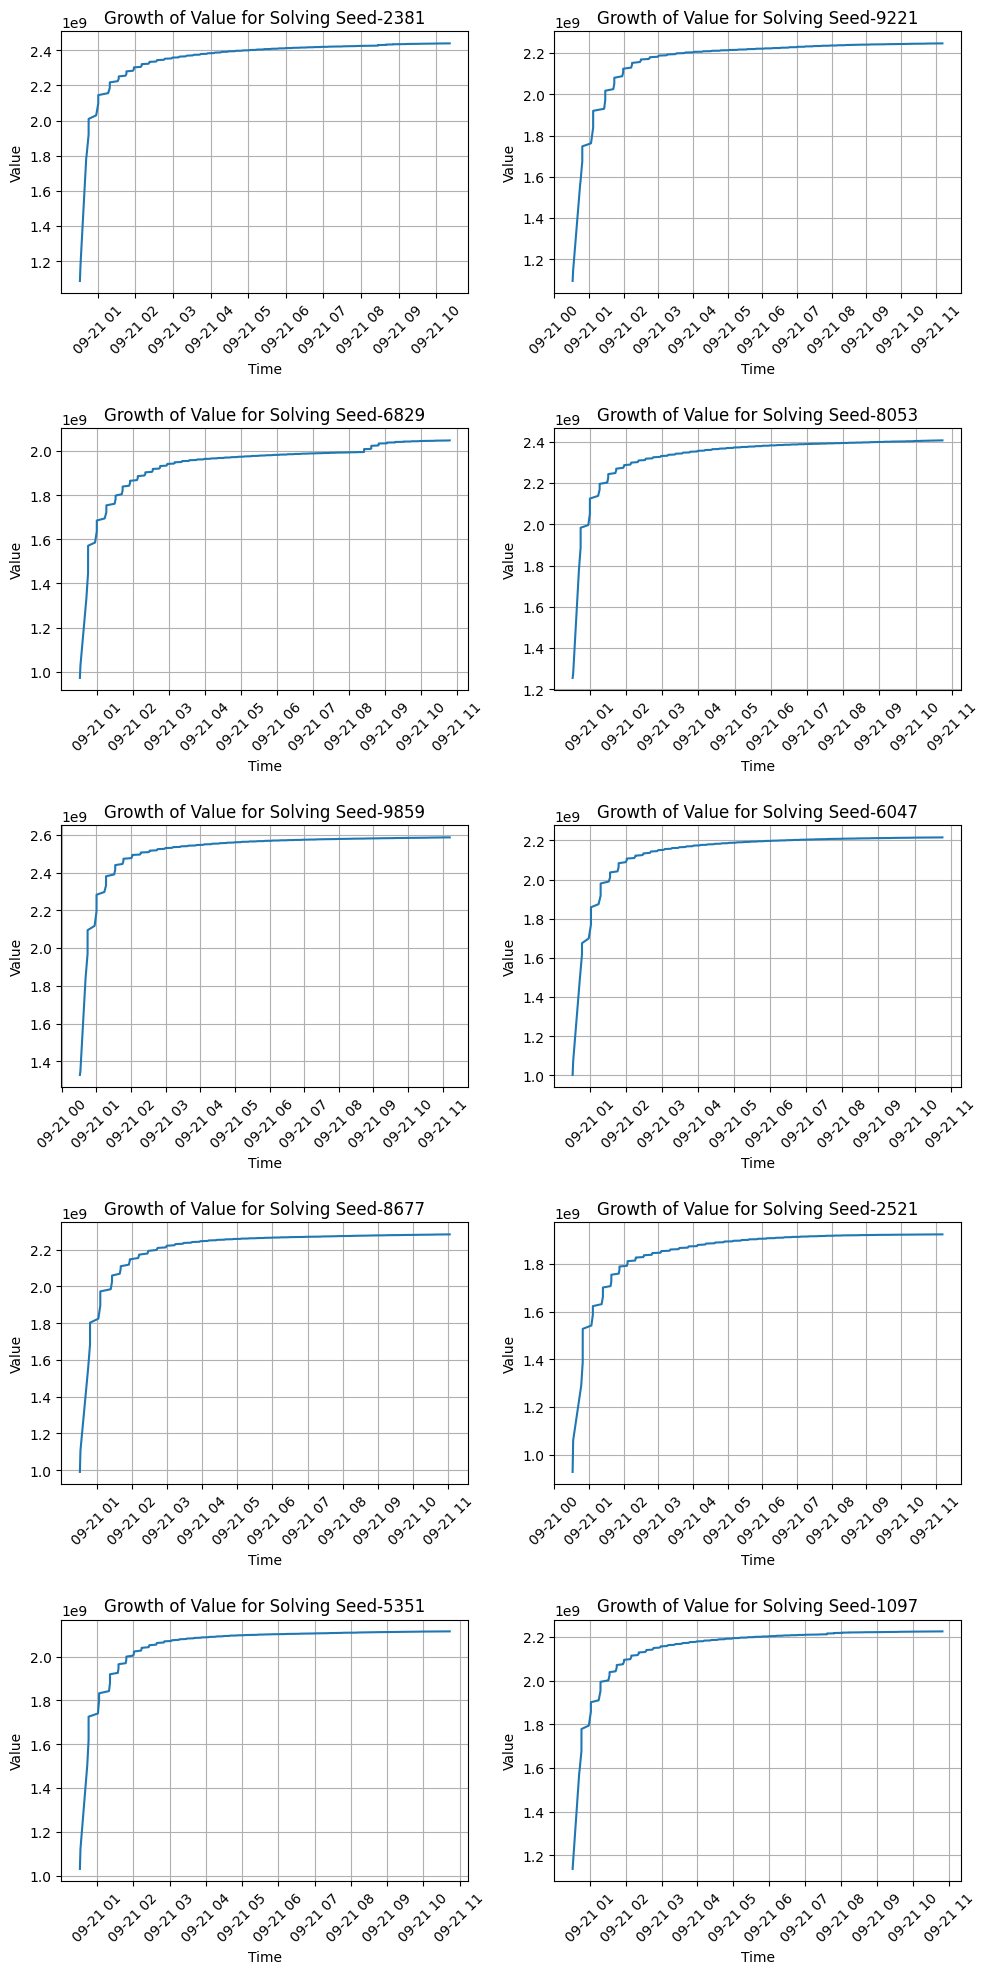

In [16]:
import matplotlib.pyplot as plt
from datetime import datetime
# Chuẩn bị dữ liệu cho đồ thị
times = []
values = []

fig, axs = plt.subplots(5, 2, figsize=(10, 20))
axs = axs.flatten()  # Chuyển đổi thành một mảng 1 chiều để dễ dàng truy cập

for idx, seed in enumerate(seeds):
    times = []
    values = []

    for date, time, action in seeds[seed]:
        if action['action'] in ('New', 'Initial'):
            datetime_str = f"{date} {time}"
            time_obj = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S,%f')
            times.append(time_obj)
            values.append(action['value'])

    # Vẽ đồ thị cho seed hiện tại
    axs[idx].plot(times, values)
    axs[idx].set_title(f'Growth of Value for {seed}')
    axs[idx].set_xlabel('Time')
    axs[idx].set_ylabel('Value')
    axs[idx].tick_params(axis='x', rotation=45)
    axs[idx].grid()

# Cải thiện hiển thị
plt.tight_layout()
plt.show()


In [9]:
# calculate time

from datetime import datetime

def time_convert(s):
    time_format = "%H:%M:%S,%f"  # Định dạng thời gian
    tmp = datetime.strptime(s, time_format)
    return tmp

for seed in seeds:
    for idx, (date, time, action) in enumerate(seeds[seed]):
        if action['action'] in ('New', 'Initial'):
            start_process_time = time
            seeds[seed][idx] = (date, time, {**action, 'process_time': 0})  # Cập nhật action
        else:
            process_time = (time_convert(time) - time_convert(start_process_time)).total_seconds()
            seeds[seed][idx] = (date, time, {**action, 'process_time': process_time})  # Cập nhật action

    

In [10]:
for seed in seeds.keys():
    print(seed)
    for _, time, action in seeds[seed]:
        print(f"{time} - {action}")

Solving Seed-2381
00:31:33,522 - {'action': 'Initial', 'value': 1088137017.386087, 'addition_value': None, 'process_time': 0}
00:32:31,243 - {'action': 'Removed', 'value': 90310206.3448565, 'addition_value': 4418, 'process_time': 57.721}
00:32:31,244 - {'action': 'New', 'value': 1178447223.7309434, 'addition_value': None, 'process_time': 0}
00:41:41,946 - {'action': 'Added', 'value': 610599164.3234487, 'addition_value': 23831, 'process_time': 550.702}
00:41:41,947 - {'action': 'New', 'value': 1789046388.054392, 'addition_value': None, 'process_time': 0}
00:42:01,251 - {'action': 'Merged', 'value': 4854977.767203093, 'addition_value': 559, 'process_time': 19.304}
00:42:01,469 - {'action': 'New', 'value': 1793901365.8215952, 'addition_value': None, 'process_time': 0}
00:45:28,466 - {'action': 'Removed', 'value': 126214288.81684685, 'addition_value': 7208, 'process_time': 206.997}
00:45:28,469 - {'action': 'New', 'value': 1920115654.638442, 'addition_value': None, 'process_time': 0}
00:45

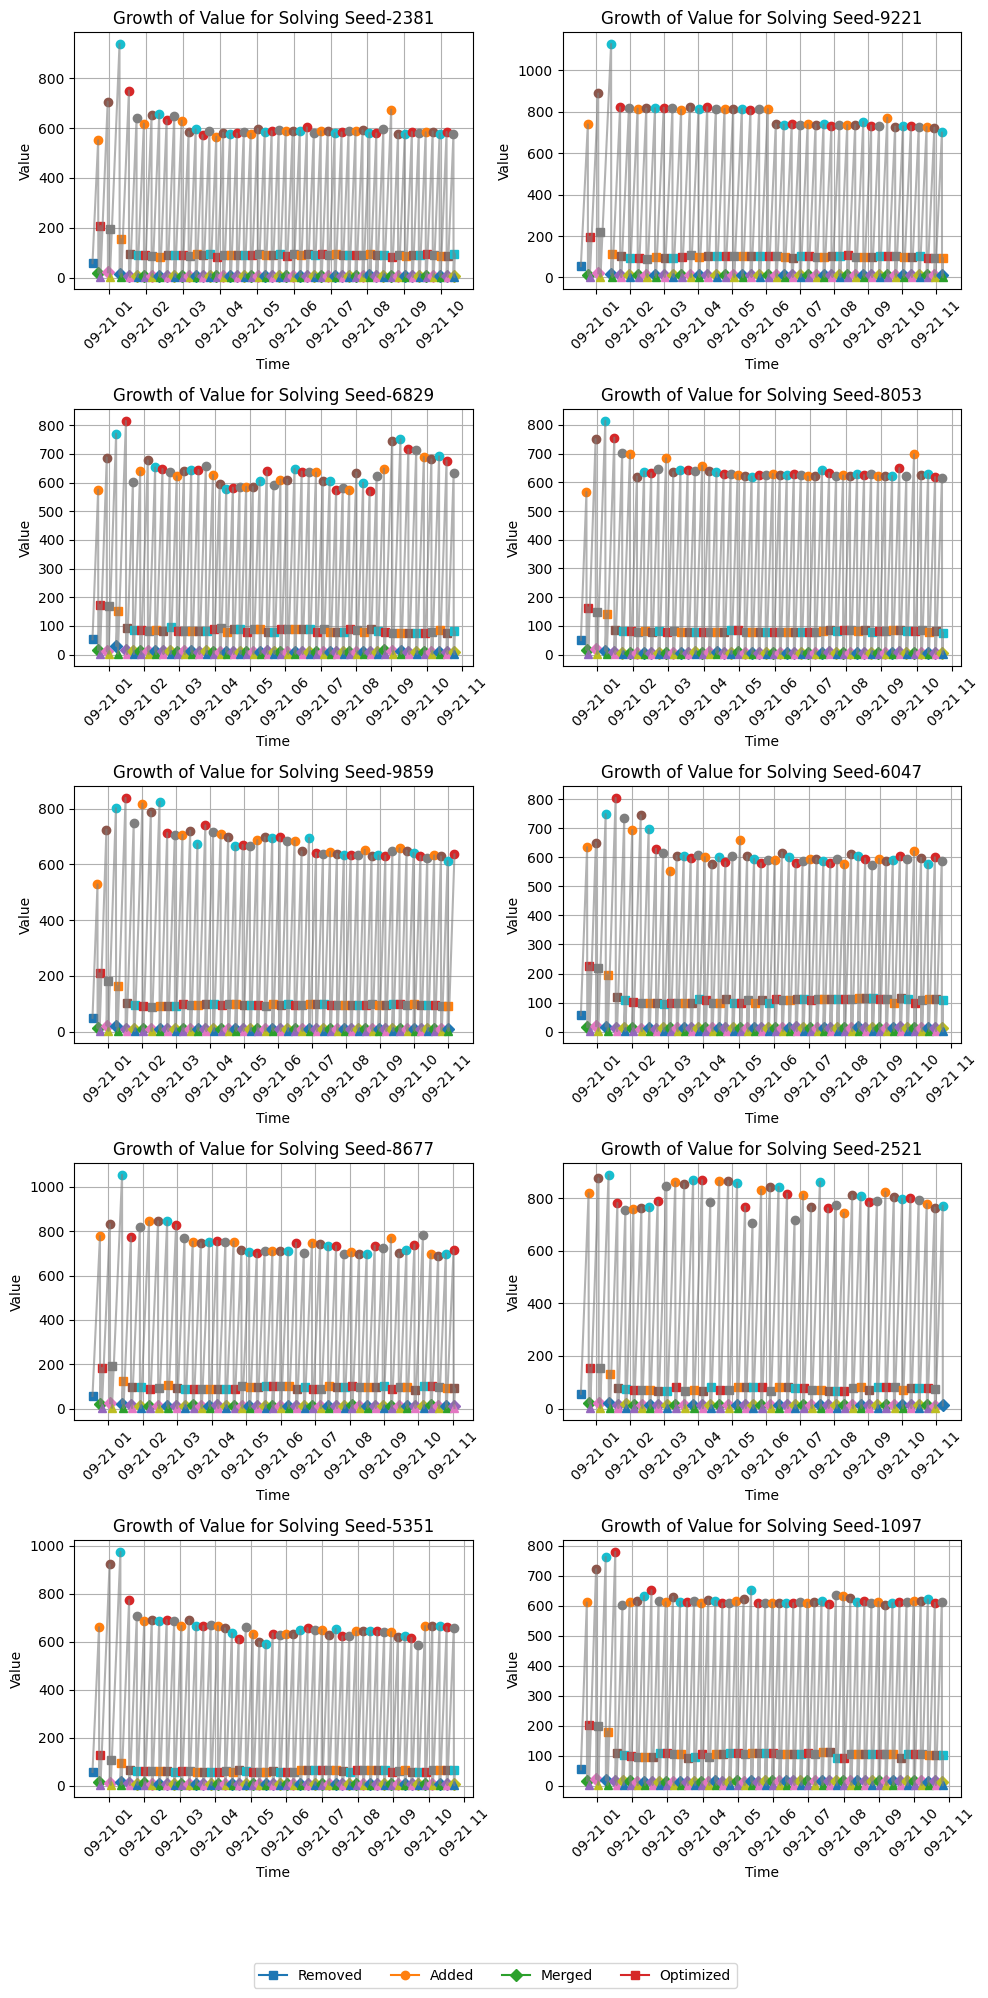

In [28]:
import matplotlib.pyplot as plt
from datetime import datetime
# Chuẩn bị dữ liệu cho đồ thị
times = []
values = []

# Tạo figure và axes cho plot 5x2
fig, axs = plt.subplots(5, 2, figsize=(10, 20))
axs = axs.flatten()  # Chuyển đổi thành một mảng 1 chiều để dễ dàng truy cập

marker_map = {
    'Added': 'o',      # Hình tròn
    'Optimized': '^',  # Hình tam giác
    'Removed': 's',    # Hình vuông
    'Merged': 'D',     # Hình thoi
}

# Danh sách để lưu nhãn cho legend
legend_labels = []

for idx, seed in enumerate(seeds):
    times = []
    values = []

    for date, time, action in seeds[seed]:
        if action['process_time'] > 0:
            datetime_str = f"{date} {time}"
            time_obj = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S,%f')
            times.append(time_obj)
            values.append(action['process_time'])
            marker = marker_map.get(action['action'], 'x')
            axs[idx].plot(time_obj, action['process_time'], marker=marker)
            # Thêm nhãn vào legend nếu chưa có
            if action['action'] not in legend_labels:
                legend_labels.append(action['action'])

    axs[idx].plot(times, values, color='gray', linestyle='-', alpha=0.6)  # Đường nối
    axs[idx].set_title(f'Growth of Value for {seed}')
    axs[idx].set_xlabel('Time')
    axs[idx].set_ylabel('Value')
    axs[idx].tick_params(axis='x', rotation=45)
    axs[idx].grid()

# Thêm legend chung ở vị trí lower center
fig.legend(legend_labels, loc='lower center', ncol=len(legend_labels), bbox_to_anchor=(0.5, 0))

# Cải thiện hiển thị
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Điều chỉnh để tránh chồng chéo với legend
plt.show()